<a href="https://colab.research.google.com/github/tbradshaw91/DS-Unit-4-Sprint-1-NLP/blob/master/LS_DS_415_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

### Imports

In [29]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


In [0]:
# Imports in one place because I am a neat freak
import warnings
warnings.filterwarnings("ignore")
import pyLDAvis.gensim
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import spacy
from spacy.tokenizer import Tokenizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
import numpy as np
import re
import gensim
from gensim.utils import smart_open, simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

### Initial Setup

In [1]:
from google.colab import files
upl = files.upload()

Saving review_sample.json to review_sample.json


In [0]:
# My data
yelp = pd.read_json('review_sample.json', lines=True)

In [3]:
yelp.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA


In [4]:
# Checking it out
yelp['text'][0]

'BEWARE!!! FAKE, FAKE, FAKE....We also own a small business in Los Alamitos, CA and received what looked like a legitimate bill for $70 with an account number and all.  I called the phone number listed (866) 273-7934.  The wait time on hold said 20 minutes and to leave a message.  I could not get a live person on the phone no matter what number I selected.  I left a very FIRM message that I would be contacting the BBB and my attorney regarding their company trying to scam businesses. This has to be illegal!!!!!'

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [0]:
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

In [0]:
# Key Words
words = ['happy','nice','go']

In [0]:
# FUNction 
def tokenize(doc):
    tokens=[]
    for text in tokenizer.tokens_from_list(doc.split()):

      if (text.is_stop == False) and (text.is_punct==False) and (text.is_space==False) and (text.lemma_ not in words):
        tokens.append(text.lemma_)     
    
    return tokens

In [9]:
tokenize(yelp['text'][0])[5:]

['business',
 'Los',
 'Alamitos,',
 'receive',
 'look',
 'like',
 'legitimate',
 'bill',
 '$70',
 'account',
 'numb',
 'all.',
 'call',
 'phone',
 'numb',
 'list',
 '(866)',
 '273-7934.',
 'wait',
 'time',
 'hold',
 'say',
 '20',
 'minute',
 'leave',
 'message.',
 'live',
 'person',
 'phone',
 'matt',
 'numb',
 'selected.',
 'leave',
 'FIRM',
 'message',
 'contact',
 'BBB',
 'attorney',
 'company',
 'try',
 'scam',
 'businesses.',
 'illegal!!!!!']

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [0]:
# Step UNO: Making a column of the tokens
yelp['tokens'] = yelp['text'].apply(tokenize)

In [11]:
# Checking it out
yelp.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[BEWARE!!!, FAKE,, FAKE,, FAKE....We, small, b..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[Came, lunch, Togo., Service, quick., Staff, f..."


In [0]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
# Function fun
def vector_ish(frame, num_features=20):
# Vectorizer fun
    tfidf = TfidfVectorizer(max_features = num_features)
    mystrings = [' '.join(x) for x in list(frame['tokens'])]
    tfidf.fit(mystrings)
    dtm = tfidf.transform(mystrings)
    vectorframe = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())
    return dtm


In [0]:
yelptastic = vector_ish(yelp)

In [15]:
# Nearest Neighbors Modeling
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=10, algorithm ='ball_tree')
# Setting up vocab etc
stringy = [' '.join(x) for x in list(yelp['tokens'])]
tfidf = TfidfVectorizer(max_features = 20)
tfidf.fit(stringy)
nn.fit(yelptastic)
my_fake_review = ["""This place is just OK, not sure how I really feel about it,
I ate the chicken salad and got food poisoning, but I lost a few pounds throwing 
up so maybe it is a good? Perhaps, they should advertise as a weight loss cafe instead? """]
new = tfidf.transform(my_fake_review)
new.todense()
revs = nn.kneighbors(new.todense())[1]
for rev in revs[0]:
  print(stringy[rev])

Huge park lot, super cool design, beer brew house doesn't leave confine it's womb pour glass, food amazing. ask for? cool place, thrill Mill Ave/Old Town ample free park cool new vibe it. I'll often!
place typical tourist trap. pay big dollar small food. justifiable flavor worth it, sadly it's not. skip one. suggest strip.
food nice. Average price meal. Nice place sit too, it's small difficult seat it's busy. Staff attentive. Friendly lunch deal 3pm.
Came lunch order house salad, lobster pizza, caprese sandwich, carbonara. dish stand pizza bite salty. find it's pricey quality food end cost $25 person tax tip. remember place good open numb year it's anymore. return here.
Positive: place look cool sound system great, it's loud pump heart music loud draw play music slow. Furthermore, floor small bar food drinks. floor washroom available. use ttc, it's block away st. Andrews. bottomline, however, show hold nonetheless awsome. Negative: pricy food drink therfore recommend eat good going. po

/usr/local/lib/python3.6/dist-packages/sklearn/neighbors/base.py:216: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: "


## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [16]:
new_yelp = pd.merge(yelp,pd.DataFrame(yelptastic.todense(), columns = tfidf.get_feature_names()),left_index=True,right_index=True)
new_yelp.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens,come,don,food,get,good,great,it,like,look,love,order,place,restaurant,service,time,try,ve,wait,want,well
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[BEWARE!!!, FAKE,, FAKE,, FAKE....We, small, b...",0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.389857,0.486075,0.0,0.0,0.0,0.0,0.000000,0.378512,0.446977,0.0,0.518347,0.0,0.0
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[Came, lunch, Togo., Service, quick., Staff, f...",0.0,0.0,0.0,0.0,0.697192,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.716885,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [17]:
# Setting up Pipeline Obj
vect = TfidfVectorizer(stop_words='english')
sgdc = SGDClassifier()

mystrings = [' '.join(x) for x in list(yelp['tokens'])]

pipe = Pipeline([('vect', vect), ('clf', sgdc)])
pipe.fit(mystrings, yelp['stars'])

Pipeline(memory=None,
         steps=[('vect',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patte...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

In [19]:
# My restaurant sucks lol
print('Stars predicted for my restaurant:', pipe.predict(my_fake_review))

Stars predicted for my restaurant: [2]


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [0]:
id_word = corpora.Dictionary(yelp['tokens'])

In [0]:
corpus = [id_word.doc2bow(text) for text in yelp['tokens']]

In [0]:
# LDA Model
lda = LdaMulticore(corpus=corpus,
                   id2word=id_word,
                   random_state=723812,
                   num_topics = 15,
                   passes=10,
                   workers=4
                  )

In [0]:
new_words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [28]:
topics = [' '.join(t[0:5]) for t in new_words]
topics

['great food service place come',
 'food place order like get',
 'time try place come experience',
 'order food good time come',
 'place get store like tell',
 'time place great good try',
 'get come time place well',
 'come like time food get',
 "place good come like it's",
 'food like great price time',
 'place come time get like',
 'like get great tell come',
 'come take like great try',
 'place like come time order',
 'food come order like place']

In [32]:
n=500
id2word_mini = corpora.Dictionary(yelp['tokens'][:n])
corpus_mini = [id2word_mini.doc2bow(text) for text in yelp['tokens'][:n]]
lda_mini = LdaMulticore(corpus=corpus_mini,
                   id2word=id2word_mini,
                   random_state=55,
                   num_topics = 10,
                   passes=10,
                   workers=4
                  )
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda_mini, corpus_mini, id2word_mini)

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.077002 -0.040073       1        1  16.071383
4      0.049519  0.077585       2        1  15.122217
8      0.054425 -0.053611       3        1  15.045712
2      0.062982 -0.010255       4        1  13.856626
3      0.035887 -0.041563       5        1  10.315928
7      0.015683  0.084682       6        1   8.747062
6     -0.045698  0.064726       7        1   6.766591
1     -0.098284  0.000304       8        1   6.388582
0     -0.069927 -0.061307       9        1   4.442176
9     -0.081589 -0.020488      10        1   3.243721, topic_info=     Category        Freq       Term       Total  loglift  logprob
1247  Default   52.000000       It's   52.000000  30.0000  30.0000
324   Default   11.000000       nail   11.000000  29.0000  29.0000
337   Default   20.000000       shop   20.000000  28.0000  28.0000
42    Default   68.000000       wait   68.000000  27.0000  27.0000
1571  Default   35.000000    chicken   35.000000  26.0000  26.0000
498   Default   58.000000        ask   58.000000  25.0000  25.0000
1002  Default   23.000000        car   23.000000  24.0000  24.0000
362   Default   64.000000      don't   64.000000  23.0000  23.0000
240   Default  120.000000      great  120.000000  22.0000  22.0000
1445  Default   17.000000        dog   17.000000  21.0000  21.0000
460   Default   66.000000       take   66.000000  20.0000  20.0000
40    Default  114.000000       time  114.000000  19.0000  19.0000
2248  Default   11.000000     French   11.000000  18.0000  18.0000
544   Default   34.000000       hour   34.000000  17.0000  17.0000
1476  Default   15.000000     coffee   15.000000  16.0000  16.0000
335   Default   85.000000    service   85.000000  15.0000  15.0000
142   Default   41.000000     people   41.000000  14.0000  14.0000
322   Default    9.000000    massage    9.000000  13.0000  13.0000
436   Default  120.000000      order  120.000000  12.0000  12.0000
923   Default   15.000000      sushi   15.000000  11.0000  11.0000
310   Default   36.000000       feel   36.000000  10.0000  10.0000
595   Default   12.000000      state   12.000000   9.0000   9.0000
419   Default   57.000000       find   57.000000   8.0000   8.0000
454   Default   48.000000      staff   48.000000   7.0000   7.0000
2650  Default   15.000000       rest   15.000000   6.0000   6.0000
1926  Default   16.000000  breakfast   16.000000   5.0000   5.0000
107   Default   46.000000       need   46.000000   4.0000   4.0000
185   Default   24.000000       star   24.000000   3.0000   3.0000
590   Default   20.000000   service.   20.000000   2.0000   2.0000
1709  Default   16.000000      steak   16.000000   1.0000   1.0000
...       ...         ...        ...         ...      ...      ...
322   Topic10    1.935389    massage    9.448945   1.8429  -6.1455
3670  Topic10    1.543328      tacos    7.239089   1.8829  -6.3719
3110  Topic10    1.046642   service!    3.880005   2.1182  -6.7603
2346  Topic10    1.546092      green    8.496126   1.7246  -6.3701
590   Topic10    2.050402   service.   20.291937   1.1363  -6.0878
40    Topic10    3.782100       time  114.141724   0.0213  -5.4756
365   Topic10    2.044615        me.   22.216240   1.0428  -6.0906
1002  Topic10    2.051987        car   23.751667   0.9796  -6.0870
812   Topic10    2.048040      visit   24.838072   0.9330  -6.0890
2037  Topic10    1.549488     return   10.787904   1.4879  -6.3679
420   Topic10    3.549341       food  141.140396  -0.2545  -5.5391
1247  Topic10    2.548822       It's   52.210316   0.4088  -5.8702
460   Topic10    2.714748       take   66.567390   0.2289  -5.8072
544   Topic10    2.047247       hour   34.661686   0.5993  -6.0894
149   Topic10    2.616781       well   83.658157  -0.0363  -5.8439
205   Topic10    2.625810       good  129.580032  -0.4705  -5.8405
240   Topic10    2.543150      great  120.113129  -0.4266  -5.8724
374   Topic10    2.058931 

In [0]:
# Looking at the top 20 most common tokens
vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False, stop_words='english')
dtm = vectorizer.fit_transform(yelp['tokens'])
dtm = pd.DataFrame(dtm.todense(), columns = vectorizer.get_feature_names())

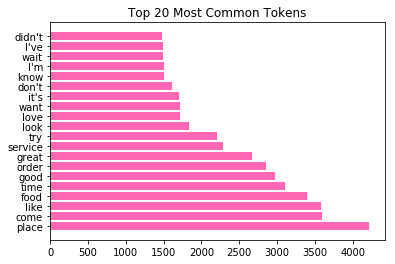

In [42]:
# Ze Plot
top20 = dtm.sum().sort_values(ascending=False)[:20]

plt.style.context('fivethirtyeight')
plt.title('Top 20 Most Common Tokens')
plt.barh(common20.index,list(top20), color='hotpink');

An initial analysis:  my model would improve from more preprocessing. With more time, I would like to go over this again and take out the more common words from topics and add some more specific stop words. Despite that, I do think I have a pretty solid starting point for analyzing the text and ratings. Because I used a low number of vectors there doesn't seem to be many negative words which was a little surprising considering all I see on Yelp is negative reviews. To end this, I will come back through and play around with my models a bit more. I would like to see how much I can improve this with additional iterations. 

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)